In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
data_train = pd.read_csv('train.csv')

In [67]:
data_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,7.412
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,8.016
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,9.070
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,9.199


### Vemos que tipo de datos tenemos en el dataset

In [4]:
data_train.describe()

,id,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798543,61.746491,57.455736,5.731269,5.735275,3.539063,7.785853
std,11678.496907,0.475739,1.437124,2.228678,1.125312,1.154908,0.711317,1.016600
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,7.785000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,8.581500
max,40454.000000,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,9.843000


In [5]:
data_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data_train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

#### Vemos la correlacion que pueden tener los datos

In [8]:
data_train.corr()

,id,carat,depth,table,x,y,z,price
id,1.000000,0.005008,-0.005396,0.002846,0.007422,0.007702,0.005633,0.007602
carat,0.005008,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,-0.005396,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.002846,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.007422,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.007702,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.005633,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.007602,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


In [10]:
df_corr = data_train.corr()

In [12]:
### Visualizacion con heatmap 

<AxesSubplot:>

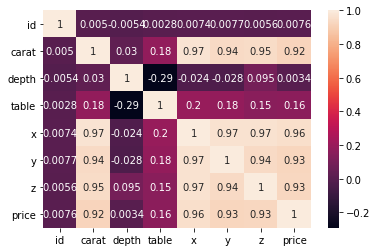

In [11]:
sns.heatmap(df_corr)

### Con dummies pasamos las columnas color, clarity y cut a numéricas

In [68]:
df_dummies = pd.get_dummies(data_train)

df_dummies.columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [69]:
df_dummies.dtypes

id                 int64
carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price            float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [15]:
df_dummies

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,0,0,...,0,0,0,0,0,0,0,1,0,0
40451,40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,0,0,...,0,0,0,0,0,0,0,1,0,0
40452,40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,0,0,...,0,0,0,0,0,1,0,0,0,0
40453,40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,0,0,...,1,0,0,0,0,0,0,1,0,0


In [48]:
# Pasar a numericos dichas columnas, per es mejor hacerlo con dummies
'''
color = {'F': 1,'D': 2,'E':3, 'J':4, 'H':5, 'I': 6, 'G':7}
data_train.color = [color[item] for item in data_train.color]

clarity = {'VS1': 1, 'SI1': 2,'VVS2': 3,'SI2':4, 'VS2':5, 'IF':6, 'VVS1': 7, 'I1':8}
data_train.clarity = [clarity[item] for item in data_train.clarity]

cut = {'Ideal': 5, 'Premium': 4,'Very Good': 3,'Good':2, 'Fair':1}
data_train.cut = [cut[item] for item in data_train.cut]
'''

In [ ]:
# data_train = data_train.drop(columns = ["depth","cut","color","clarity"])

In [ ]:
data_train = data_train.reset_index(drop=True)

In [49]:
data_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,4,7,1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,2,7,5,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,4,5,4,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,3,4,1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,3,1,4,62.8,57.0,6.37,6.44,4.02,8.314
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,5,3,5,62.5,55.0,5.08,5.13,3.19,7.412
40451,40451,0.80,5,5,5,62.1,54.0,5.96,5.99,3.71,8.016
40452,40452,1.53,4,7,4,58.7,59.0,7.51,7.45,4.39,9.070
40453,40453,1.51,5,6,5,61.6,54.0,7.38,7.42,4.57,9.199


In [70]:
df_dummies.to_csv('limpio_train.csv')

### Montamos el modelo

In [50]:
X = data_train.drop(['price','id'],axis=1)
y = data_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model: Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

In [ ]:
linear_regression = lr.fit(X_train,y_train)

In [ ]:
pickle.dump(linear_regression, open("linear_regression_model", 'wb'))

In [ ]:
linear_regression = pickle.load(open("linear_regression_model", 'rb'))

In [ ]:
linear_regression.predict(X_test)

##  Model: Gradient Boosting Regression

In [ ]:
params = {'n_estimators': 740, 'max_depth': 8, 'min_samples_split': 300, 'min_samples_leaf':9,
          'learning_rate': 0.01, 'loss': 'ls'}

gradient = ensemble.GradientBoostingRegressor(**params)

gradient_boosting = gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

In [ ]:
pickle.dump(gradient_boosting, open("gradient_boosting_model", 'wb'))

## Model: KneighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

In [ ]:
KneighborsRegressor = model.fit(X_train, y_train)

In [ ]:
y_pred = KneighborsRegressor.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

## Model: Random Forest Regressor

In [ ]:
model2 = RandomForestRegressor(n_estimators=600, max_depth=20, min_samples_leaf=3, random_state=111)
selector = RFECV(model2, step=1, cv=5)
model2.fit(X_train, y_train)

In [ ]:
RandomForestRegressor = model2.fit(X_train, y_train)

In [ ]:
y_pred = RandomForestRegressor.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

# H20

In [58]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from C:\Users\Dario\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Dario\AppData\Local\Temp\tmpk1odtfi2
  JVM stdout: C:\Users\Dario\AppData\Local\Temp\tmpk1odtfi2\h2o_Dario_started_from_python.out
  JVM stderr: C:\Users\Dario\AppData\Local\Temp\tmpk1odtfi2\h2o_Dario_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_Dario_kcqygz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.988 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [59]:
from h2o.automl import H2OAutoML

In [64]:
a = pd.read_csv("limpio_train.csv")

In [65]:
a

,Unnamed: 0,id,carat,table,x,y,z,price
0,0,0,1.01,58.0,6.36,6.31,3.97,8.754
1,1,1,0.60,57.0,5.31,5.38,3.43,7.492
2,2,2,1.60,59.0,7.55,7.60,4.50,9.010
3,3,3,0.30,58.0,4.27,4.24,2.70,6.227
4,4,4,1.00,57.0,6.37,6.44,4.02,8.314
...,...,...,...,...,...,...,...,...
40450,40450,40450,0.51,55.0,5.08,5.13,3.19,7.412
40451,40451,40451,0.80,54.0,5.96,5.99,3.71,8.016
40452,40452,40452,1.53,59.0,7.51,7.45,4.39,9.070
40453,40453,40453,1.51,54.0,7.38,7.42,4.57,9.199


In [ ]:
train = h2o.import_file("limpio_train.csv")


x = train.columns
y = "price"
_id = "id"

x.remove(_id)
x.remove(y)


aml = H2OAutoML(max_models=50, seed=42, max_runtime_secs= 300, sort_metric= "mse")
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
aml.leader

In [ ]:
# Guardas h20

In [73]:
aml.leader.download_mojo(path= "./h20_model")

'C:\\Users\\Dario\\Desktop\\Kaggle_competition\\h20_model'